In [1]:
## Loading the Pre_Processed File for Model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pre_processed_file = pd.read_csv("Pre_Processed File.csv")
pre_processed_file = pre_processed_file.drop("Unnamed: 0",axis=1)
pre_processed_file.head()

,headline,is_sarcastic,source,len,ents_name,tokens_num,sents_num,clean_hd,tokens,headline_new,lemmat,stopped
0,former versace store clerk sues over secret 'b...,0,huffingtonpost,12,0,14,1,former versace store clerk sues over secret bl...,"['former', 'versace', 'store', 'clerk', 'sues'...","['former', 'versace', 'store', 'clerk', 'sue',...",former versace store clerk sue secret black co...,former versace store clerk sues secret black c...
1,the 'roseanne' revival catches up to our thorn...,0,huffingtonpost,14,0,17,1,the roseanne revival catches up to our thorny ...,"['the', 'roseanne', 'revival', 'catches', 'up'...","['roseanne', 'revival', 'catch', 'thorny', 'po...",roseanne revival catch thorny political mood b...,roseanne revival catches thorny political mood...
2,mom starting to fear son's web series closest ...,1,theonion,14,0,15,1,mom starting to fear sons web series closest t...,"['mom', 'starting', 'to', 'fear', 'sons', 'web...","['mom', 'start', 'fear', 'son', 'web', 'series...",mom start fear son web series closest thing gr...,mom starting fear sons web series closest thin...
3,"boehner just wants wife to listen, not come up...",1,theonion,13,0,16,1,boehner just wants wife to listen not come up ...,"['boehner', 'just', 'wants', 'wife', 'to', 'li...","['boehner', 'want', 'wife', 'listen', 'come', ...",boehner want wife listen come alternative debt...,boehner wants wife listen come alternative deb...
4,j.k. rowling wishes snape happy birthday in th...,0,huffingtonpost,11,0,12,2,jk rowling wishes snape happy birthday in the ...,"['jk', 'rowling', 'wishes', 'snape', 'happy', ...","['j', 'k', 'rowling', 'wish', 'snape', 'happy'...",j k rowling wish snape happy birthday magical way,jk rowling wishes snape happy birthday magical...


In [3]:
# Corpus Selection on which you want to train your model
corpus_selection = "headline" 

In [4]:
#Linear Support Vector Classifier
#The task requires a text dataset that has sentences to be classified and labels for that sentences. The amount of data for this task can only be estimated once the model building phase starts. It has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. C is the penalty parameter and it is set to 1 because the accuracy somehow increases, and the kernel is set to linear, the other kernels (poly and rbf) are either too slow or innacurate.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
#Checking the shape of training data
Y = pd.get_dummies(pre_processed_file['is_sarcastic']).values
print(Y.shape)

(26606, 2)


In [7]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pre_processed_file[corpus_selection],pre_processed_file['is_sarcastic'],test_size=0.3,random_state=33)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18624,) (18624,)
(7982,) (7982,)


In [9]:
#Train and evaluate the model
vect = CountVectorizer(ngram_range=(1, 2)).fit(X_train)

In [10]:
#vectorize sentences bow 
X_train_vectorized = vect.transform(X_train)

In [11]:
print("Shape of Sparse Matrix: ", X_train_vectorized.shape)

Shape of Sparse Matrix:  (18624, 135863)


In [12]:
X_train_vectorized.nnz ## non zero occurances

341152

In [13]:
sparsity = (100.0 * X_train_vectorized.nnz / (X_train_vectorized.shape[0] * ( X_train_vectorized.shape[1])))
print("Sparcity : {}".format(sparsity))

Sparcity : 0.013482603369429176


In [14]:
#tfidf weights
tfidf_transformer = TfidfTransformer(sublinear_tf=True).fit(X_train_vectorized) ## replace tf with 1 + log(tf)

In [15]:
headline_tfidf = tfidf_transformer.transform(X_train_vectorized)

In [16]:
print(headline_tfidf)

  (0, 128377)	0.21662787756507354
  (0, 128351)	0.19869714903236663
  (0, 128230)	0.23244410509345764
  (0, 120524)	0.20318264951521828
  (0, 119484)	0.07391511154015239
  (0, 109713)	0.32757245901123866
  (0, 109675)	0.22109121145850844
  (0, 93277)	0.32757245901123866
  (0, 93274)	0.287098440060486
  (0, 75308)	0.32757245901123866
  (0, 75145)	0.15882703182902314
  (0, 72807)	0.32757245901123866
  (0, 72806)	0.2979691187314603
  (0, 70295)	0.32757245901123866
  (0, 70229)	0.1760053167305497
  (1, 123357)	0.22863691422360802
  (1, 123326)	0.11275894797109198
  (1, 119584)	0.2593180386681758
  (1, 119484)	0.06870596054742927
  (1, 110764)	0.19224121468149283
  (1, 83985)	0.28367101718182913
  (1, 83951)	0.10292714020691278
  (1, 55428)	0.2593180386681758
  (1, 55420)	0.24203932543469941
  (1, 23862)	0.304486863055394
  :	:
  (18622, 89135)	0.284011862722897
  (18622, 89120)	0.19221408981765453
  (18622, 87204)	0.284011862722897
  (18622, 87202)	0.24188038347781896
  (18622, 86701)	0.28

In [17]:
sarcasm_detect_model = LinearSVC(C=10.01,max_iter=1000)

In [18]:
sarcasm_detect_model.fit(headline_tfidf,y_train)

LinearSVC(C=10.01)

In [19]:
feature_names = np.array(vect.get_feature_names())

In [20]:
sorted_coef_index = sarcasm_detect_model.coef_[0].argsort()

In [21]:
print("Negative Word", feature_names[sorted_coef_index[:9]])

Negative Word ['the' 'is' 'and' 'trump' 'an' 'your' 'why' 'are' 'how']


In [22]:
print("Postive Word", feature_names[sorted_coef_index[:-11:-2]])

Postive Word ['nation' 'report' 'study' 'onion' 'clearly']


In [23]:
import eli5 as el

In [24]:
el.show_weights(estimator=LinearSVC(C=10.01,max_iter=1000).fit(headline_tfidf,y_train),
                vec =CountVectorizer(ngram_range=(1, 2)).fit(X_train))

In [25]:
svc_score = sarcasm_detect_model.score(tfidf_transformer.transform(vect.transform(X_test)),y_test)

In [26]:
svc_score 

0.8536707592082184

In [27]:
y_pred = sarcasm_detect_model.predict(tfidf_transformer.transform(vect.transform(X_test)))
yt_pred = sarcasm_detect_model.predict(tfidf_transformer.transform(X_train_vectorized))

In [28]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [29]:
yt_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [30]:
Confusion_Matrix = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix :\n {Confusion_Matrix}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_test,y_pred)}')

Confusion Matrix :
 [[3955  568]
 [ 600 2859]]

Test Set Accuracy Score :
 0.8536707592082184

Train Set Accuracy Score :
 1.0

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      4523
           1       0.83      0.83      0.83      3459

    accuracy                           0.85      7982
   macro avg       0.85      0.85      0.85      7982
weighted avg       0.85      0.85      0.85      7982



Text(0.5, 51.0, 'Predicted Labels')

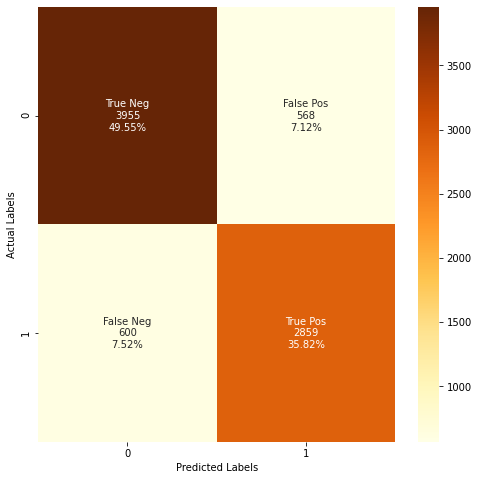

In [31]:
plt.figure(figsize=(8,8))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in Confusion_Matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in Confusion_Matrix.flatten()/np.sum(Confusion_Matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(Confusion_Matrix, annot=labels, fmt='', cbar=True,cmap='YlOrBr')

plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

# MODEL CHECKING HEADING

In [61]:
my_index= 1

analyser = input("Enter your sarcasm: ") 
X_test[my_index] = analyser

my_index = y_pred.shape[0]-1

y_pred = sarcasm_detect_model.predict(vect.transform(X_test))

if y_pred[my_index] == 1:
    print("Is Sarcastic ")
else:
    print("Not Sarcastic") 

Enter your sarcasm: the injustice of mandatory minimums
Not Sarcastic


In [44]:
## Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'C':np.arange(0.01,100,10),
              'max_iter': [1000,2000,5000,10000]}

In [47]:
linearSVC = GridSearchCV(LinearSVC(),param_grid,cv=5,return_train_score=True,verbose=3)

In [48]:
linearSVC.fit(headline_tfidf,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END C=0.01, max_iter=1000;, score=(train=0.757, test=0.708) total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000;, score=(train=0.751, test=0.697) total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000;, score=(train=0.752, test=0.701) total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000;, score=(train=0.751, test=0.703) total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000;, score=(train=0.750, test=0.706) total time=   0.0s
[CV 1/5] END C=0.01, max_iter=2000;, score=(train=0.757, test=0.708) total time=   0.0s
[CV 2/5] END C=0.01, max_iter=2000;, score=(train=0.751, test=0.697) total time=   0.0s
[CV 3/5] END C=0.01, max_iter=2000;, score=(train=0.752, test=0.701) total time=   0.0s
[CV 4/5] END C=0.01, max_iter=2000;, score=(train=0.751, test=0.703) total time=   0.0s
[CV 5/5] END C=0.01, max_iter=2000;, score=(train=0.750, test=0.706) total time=   0.0s
[CV 1/5] END C=0.01, max_iter=5000;, score=(train=0.757, t

[CV 3/5] END C=40.01, max_iter=5000;, score=(train=1.000, test=0.849) total time=   1.8s
[CV 4/5] END C=40.01, max_iter=5000;, score=(train=1.000, test=0.855) total time=   1.9s
[CV 5/5] END C=40.01, max_iter=5000;, score=(train=1.000, test=0.853) total time=   1.8s
[CV 1/5] END C=40.01, max_iter=10000;, score=(train=1.000, test=0.854) total time=   1.9s
[CV 2/5] END C=40.01, max_iter=10000;, score=(train=1.000, test=0.847) total time=   1.9s
[CV 3/5] END C=40.01, max_iter=10000;, score=(train=1.000, test=0.849) total time=   1.8s
[CV 4/5] END C=40.01, max_iter=10000;, score=(train=1.000, test=0.855) total time=   2.0s
[CV 5/5] END C=40.01, max_iter=10000;, score=(train=1.000, test=0.853) total time=   1.8s
[CV 1/5] END C=50.01, max_iter=1000;, score=(train=1.000, test=0.854) total time=   2.6s
[CV 2/5] END C=50.01, max_iter=1000;, score=(train=1.000, test=0.847) total time=   2.9s
[CV 3/5] END C=50.01, max_iter=1000;, score=(train=1.000, test=0.849) total time=   2.8s
[CV 4/5] END C=5

d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END C=60.01, max_iter=1000;, score=(train=1.000, test=0.849) total time=   3.5s
[CV 4/5] END C=60.01, max_iter=1000;, score=(train=1.000, test=0.855) total time=   3.1s
[CV 5/5] END C=60.01, max_iter=1000;, score=(train=1.000, test=0.853) total time=   3.2s
[CV 1/5] END C=60.01, max_iter=2000;, score=(train=1.000, test=0.854) total time=   3.1s
[CV 2/5] END C=60.01, max_iter=2000;, score=(train=1.000, test=0.847) total time=   3.3s
[CV 3/5] END C=60.01, max_iter=2000;, score=(train=1.000, test=0.849) total time=   3.5s
[CV 4/5] END C=60.01, max_iter=2000;, score=(train=1.000, test=0.855) total time=   3.5s
[CV 5/5] END C=60.01, max_iter=2000;, score=(train=1.000, test=0.853) total time=   3.7s
[CV 1/5] END C=60.01, max_iter=5000;, score=(train=1.000, test=0.854) total time=   3.1s
[CV 2/5] END C=60.01, max_iter=5000;, score=(train=1.000, test=0.847) total time=   3.5s
[CV 3/5] END C=60.01, max_iter=5000;, score=(train=1.000, test=0.849) total time=   3.4s
[CV 4/5] END C=60.01,

d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END C=70.01, max_iter=1000;, score=(train=1.000, test=0.854) total time=   3.8s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END C=70.01, max_iter=1000;, score=(train=1.000, test=0.847) total time=   3.6s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END C=70.01, max_iter=1000;, score=(train=1.000, test=0.849) total time=   3.1s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END C=70.01, max_iter=1000;, score=(train=1.000, test=0.855) total time=   3.0s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END C=70.01, max_iter=1000;, score=(train=1.000, test=0.853) total time=   3.1s
[CV 1/5] END C=70.01, max_iter=2000;, score=(train=1.000, test=0.854) total time=   3.3s
[CV 2/5] END C=70.01, max_iter=2000;, score=(train=1.000, test=0.847) total time=   3.6s
[CV 3/5] END C=70.01, max_iter=2000;, score=(train=1.000, test=0.849) total time=   3.2s
[CV 4/5] END C=70.01, max_iter=2000;, score=(train=1.000, test=0.855) total time=   3.5s
[CV 5/5] END C=70.01, max_iter=2000;, score=(train=1.000, test=0.853) total time=   3.4s
[CV 1/5] END C=70.01, max_iter=5000;, score=(train=1.000, test=0.854) total time=   3.2s
[CV 2/5] END C=70.01, max_iter=5000;, score=(train=1.000, test=0.847) total time=   3.7s
[CV 3/5] END C=70.01, max_iter=5000;, score=(train=1.000, test=0.849) total time=   4.5s
[CV 4/5] END C=70.01, max_iter=5000;, score=(train=1.000, test=0.855) total time=   3.5s
[CV 5/5] END C=70.01, max_iter=5000;, score=(train=1.000, test=0.853) total time=   3.7s
[CV 1/5] END C=70.01,

d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END C=80.01, max_iter=1000;, score=(train=1.000, test=0.854) total time=   3.4s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END C=80.01, max_iter=1000;, score=(train=1.000, test=0.847) total time=   3.4s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END C=80.01, max_iter=1000;, score=(train=1.000, test=0.849) total time=   3.4s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END C=80.01, max_iter=1000;, score=(train=1.000, test=0.855) total time=   3.4s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END C=80.01, max_iter=1000;, score=(train=1.000, test=0.853) total time=   4.1s
[CV 1/5] END C=80.01, max_iter=2000;, score=(train=1.000, test=0.854) total time=   4.2s
[CV 2/5] END C=80.01, max_iter=2000;, score=(train=1.000, test=0.847) total time=   4.0s
[CV 3/5] END C=80.01, max_iter=2000;, score=(train=1.000, test=0.849) total time=   4.0s
[CV 4/5] END C=80.01, max_iter=2000;, score=(train=1.000, test=0.855) total time=   4.3s
[CV 5/5] END C=80.01, max_iter=2000;, score=(train=1.000, test=0.853) total time=   4.4s
[CV 1/5] END C=80.01, max_iter=5000;, score=(train=1.000, test=0.854) total time=   3.8s
[CV 2/5] END C=80.01, max_iter=5000;, score=(train=1.000, test=0.847) total time=   4.0s
[CV 3/5] END C=80.01, max_iter=5000;, score=(train=1.000, test=0.849) total time=   3.9s
[CV 4/5] END C=80.01, max_iter=5000;, score=(train=1.000, test=0.855) total time=   3.5s
[CV 5/5] END C=80.01, max_iter=5000;, score=(train=1.000, test=0.853) total time=   3.3s
[CV 1/5] END C=80.01,

d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5] END C=90.01, max_iter=1000;, score=(train=1.000, test=0.854) total time=   3.2s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5] END C=90.01, max_iter=1000;, score=(train=1.000, test=0.847) total time=   3.0s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5] END C=90.01, max_iter=1000;, score=(train=1.000, test=0.849) total time=   3.0s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5] END C=90.01, max_iter=1000;, score=(train=1.000, test=0.855) total time=   3.0s


d:\python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5] END C=90.01, max_iter=1000;, score=(train=1.000, test=0.853) total time=   3.3s
[CV 1/5] END C=90.01, max_iter=2000;, score=(train=1.000, test=0.854) total time=   4.3s
[CV 2/5] END C=90.01, max_iter=2000;, score=(train=1.000, test=0.847) total time=   4.5s
[CV 3/5] END C=90.01, max_iter=2000;, score=(train=1.000, test=0.849) total time=   3.8s
[CV 4/5] END C=90.01, max_iter=2000;, score=(train=1.000, test=0.855) total time=   4.5s
[CV 5/5] END C=90.01, max_iter=2000;, score=(train=1.000, test=0.853) total time=   4.6s
[CV 1/5] END C=90.01, max_iter=5000;, score=(train=1.000, test=0.854) total time=   5.4s
[CV 2/5] END C=90.01, max_iter=5000;, score=(train=1.000, test=0.847) total time=   4.8s
[CV 3/5] END C=90.01, max_iter=5000;, score=(train=1.000, test=0.849) total time=   6.3s
[CV 4/5] END C=90.01, max_iter=5000;, score=(train=1.000, test=0.855) total time=   6.2s
[CV 5/5] END C=90.01, max_iter=5000;, score=(train=1.000, test=0.853) total time=   5.3s
[CV 1/5] END C=90.01,

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'max_iter': [1000, 2000, 5000, 10000]},
             return_train_score=True, verbose=3)

In [49]:
print(linearSVC.best_params_)

{'C': 10.01, 'max_iter': 1000}


In [50]:
linearSVC.best_estimator_

LinearSVC(C=10.01)

In [33]:
def Headline_traverser(headline_text):
    document = nlp(headline_text)
    
    ## Checking Document and len of readed document
    print("Headline : {}".format(document))
    print("\nTotal number of tokens in document : {}".format(len(document)))
    print()
    
    ## Print tokens in each doc
    for tokens in document:
        print(tokens.text,end=' | ')
        
    print("\n")
    
    ## printing tokens, parts_of_speech , Dependency of words with explanation
    for tokens in document:
        print(f'{tokens.text:{12}}{tokens.pos_:{10}}{tokens.dep_:{12}}{str(spacy.explain(tokens.dep_))}')
    
    print(f'\nTotal number of Sentences : {len(list(document.sents))}')
    
    ## breaking down doc into sentences with respect to their punctuations i.e full stop
    for sent in document.sents:
        print(sent)
     
    ## checking real world names entities
    """
    doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

    for ent in doc.ents:
    print(ent.text,ent.label_)
    OUTPUT : 
    Apple ORG
    U.K. GPE
    $1 billion MONEY
    
    """
    if len(document.ents)>0:
        print(f'\nTotal number of Entity : {len(document.ents)}\n')    
        for ent in document.ents:
             print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))        
        displacy.render(document,style='ent',jupyter=True)
    options = {'compact':True,'bg':'black',
                    'color':'#fff', 'font':'Sans Serif',
              'distance': 300}
    displacy.render(document,style='dep',jupyter=True,options=options)

In [34]:
## library in order to show dependency graph
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

In [35]:
Headline_traverser(pre_processed_file[corpus_selection][6089])

Headline : can the u.s. and india create an enduring entente?

Total number of tokens in document : 11

can | the | u.s | . | and | india | create | an | enduring | entente | ? | 

can         AUX       aux         auxiliary
the         DET       det         determiner
u.s         PROPN     nsubj       nominal subject
.           PUNCT     punct       punctuation
and         CCONJ     cc          coordinating conjunction
india       NOUN      nsubj       nominal subject
create      VERB      ROOT        None
an          DET       det         determiner
enduring    VERB      amod        adjectival modifier
entente     NOUN      dobj        direct object
?           PUNCT     punct       punctuation

Total number of Sentences : 1
can the u.s. and india create an enduring entente?

Total number of Entity : 1

india - GPE - Countries, cities, states


In [36]:
Headline_traverser(pre_processed_file[corpus_selection][7667])

Headline : kate winslet refused to thank 'nasty' harvey weinstein in 2009 oscar speech

Total number of tokens in document : 14

kate | winslet | refused | to | thank | ' | nasty | ' | harvey | weinstein | in | 2009 | oscar | speech | 

kate        ADV       advmod      adverbial modifier
winslet     NOUN      nsubj       nominal subject
refused     VERB      ROOT        None
to          PART      aux         auxiliary
thank       VERB      xcomp       open clausal complement
'           PUNCT     punct       punctuation
nasty       ADJ       amod        adjectival modifier
'           PUNCT     punct       punctuation
harvey      NOUN      dobj        direct object
weinstein   ADJ       amod        adjectival modifier
in          ADP       prep        prepositional modifier
2009        NUM       nummod      numeric modifier
oscar       NOUN      amod        adjectival modifier
speech      NOUN      pobj        object of preposition

Total number of Sentences : 1
kate winslet refused t